<a href="https://colab.research.google.com/github/lakhanrajpatlolla/aiml-learning/blob/master/PyTorch_MB_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## PyTorch : Model Building - I & Data Class

## Learning Objectives

At the end of the experiment, you will be able to

* understand & build different components of Model Class in PyTorch through a regression example
* understand & build  the train and test loop in PyTorch
* understand & build Customdataset Class in PyTorch
* understand batch processing in PyTorch
* understand & use dataloader in PyTorch

In [ ]:
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
# Check PyTorch version
torch.__version__

'2.5.1+cu124'

### **Downloading  & Understanding data**

In [ ]:
!wget -qq https://cdn.iisc.talentsprint.com/AIandMLOps/Datasets/data1.txt

#### Visualizing the data

In [ ]:
df=pd.read_csv('data1.txt',header=None)
df.rename(columns={0:'Population',1:'Profit'},inplace=True)
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0, 0.5, 'Profit of Appolo Pharmacy in 10,000')

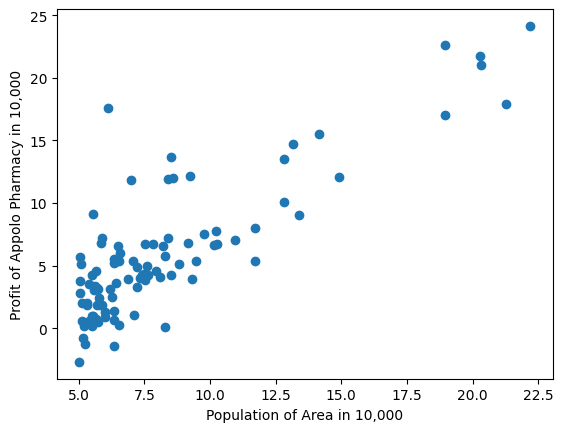

In [ ]:
plt.scatter(df.Population,df.Profit)
plt.xlabel('Population of Area in 10,000')
plt.ylabel('Profit of Appolo Pharmacy in 10,000')

In [ ]:
data,targets=  df.Population.values[:,np.newaxis],df.Profit.values[:,np.newaxis]

In [ ]:
targets

array([[17.592  ],
       [ 9.1302 ],
       [13.662  ],
       [11.854  ],
       [ 6.8233 ],
       [11.886  ],
       [ 4.3483 ],
       [12.     ],
       [ 6.5987 ],
       [ 3.8166 ],
       [ 3.2522 ],
       [15.505  ],
       [ 3.1551 ],
       [ 7.2258 ],
       [ 0.71618],
       [ 3.5129 ],
       [ 5.3048 ],
       [ 0.56077],
       [ 3.6518 ],
       [ 5.3893 ],
       [ 3.1386 ],
       [21.767  ],
       [ 4.263  ],
       [ 5.1875 ],
       [ 3.0825 ],
       [22.638  ],
       [13.501  ],
       [ 7.0467 ],
       [14.692  ],
       [24.147  ],
       [-1.22   ],
       [ 5.9966 ],
       [12.134  ],
       [ 1.8495 ],
       [ 6.5426 ],
       [ 4.5623 ],
       [ 4.1164 ],
       [ 3.3928 ],
       [10.117  ],
       [ 5.4974 ],
       [ 0.55657],
       [ 3.9115 ],
       [ 5.3854 ],
       [ 2.4406 ],
       [ 6.7318 ],
       [ 1.0463 ],
       [ 5.1337 ],
       [ 1.844  ],
       [ 8.0043 ],
       [ 1.0179 ],
       [ 6.7504 ],
       [ 1.8396 ],
       [ 4.2

### **Train-Test Split**

In [ ]:
train_data,test_data,train_targets,test_targets=train_test_split(data,targets)

In [ ]:
train_data.shape

(72, 1)

In [ ]:
test_data.shape

(25, 1)

### **Setting the GPU**

In [ ]:
# Linux bash command to print the status of nvidia gpu (memory and processes)
!nvidia-smi

Tue Feb 11 21:57:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device("cuda")

### **Class approach for Regression**

In [ ]:
from torch import nn # nn contains all of PyTorch's building blocks for neural networks

In [ ]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module):# <- almost everything in PyTorch is a nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    # <- start with random weights, get adjusted as the model learns, float32 by default, gradient tracking for GD updates)
    self.bias = nn.Parameter(torch.randn(1,dtype=torch.float), requires_grad=True)

  # Forward defines the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
    return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

* **Using Linear Layer**

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

In [ ]:
# Define the Linear Regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1) ## Say I have 3 features , now what is the change here?  self.linear = nn.Linear(3, 6)
        #self.linear = nn.Linear(6, 1)
    def forward(self, x):
        return self.linear(x)

* Checking the contents of a PyTorch model:

Let's create a model instance with the class we've made and check its parameters using .parameters().



In [ ]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel().to(device) ## Different from Tensorflow

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([[0.7645]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.8300], device='cuda:0', requires_grad=True)]

We can also get the state (what the model contains) of the model using .state_dict().

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear.bias', tensor([0.8300], device='cuda:0'))])

Making predictions using torch.inference_mode()

To check this we can pass it the test data X_test to see how closely it predicts y_test.

When we pass data to our model, it'll go through the model's forward() method and produce a result using the computation we've defined.

Let's make some predictions.

In [ ]:
test_data[:,0]

array([ 7.5386, 18.959 ,  6.002 ,  5.6407, 14.164 ,  5.5649,  6.5159,
        9.3102,  7.2259,  6.8825,  5.1884,  7.3345, 18.945 ,  6.4862,
        8.3829,  6.2742,  5.5277, 14.908 ,  8.5172,  9.7687, 20.341 ,
        7.6031,  5.1793,  6.3534,  5.7077])

In [ ]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(torch.from_numpy(test_data).float().to(device)) ## different tensorflow


* **torch.inference_mode()** : Turns off gradient tracking (necessary for training but not for inference) to make forward-passes (data going through the forward() method faster.

* Note: In older PyTorch code, you may also see **torch.no_grad()** being used for inference. While torch.inference_mode() and torch.no_grad() do similar things,
torch.inference_mode() is newer, potentially faster and preferred.

In [ ]:
# Check the predictions
print(f"Number of testing samples: {len(test_data)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 25
Number of predictions made: 25
Predicted values:
tensor([[ 6.5936],
        [15.3249],
        [ 5.4188],
        [ 5.1425],
        [11.6589],
        [ 5.0846],
        [ 5.8117],
        [ 7.9480],
        [ 6.3545],
        [ 6.0919],
        [ 4.7967],
        [ 6.4375],
        [15.3142],
        [ 5.7890],
        [ 7.2391],
        [ 5.6269],
        [ 5.0561],
        [12.2277],
        [ 7.3417],
        [ 8.2986],
        [16.3815],
        [ 6.6429],
        [ 4.7898],
        [ 5.6874],
        [ 5.1938]], device='cuda:0')


### **Train model**

* Defining loss function and optimizer

In [ ]:
# Create the loss function
loss_fn = nn.MSELoss().to(device) # MSE loss
# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) # parameters of the model to optimize,  learning rate

In [ ]:
# Converting data into torch tensor and passing into GPU
X_train=torch.from_numpy(train_data).float().to(device)
y_train=torch.from_numpy(train_targets).float().to(device)
X_test=torch.from_numpy(test_data).float().to(device)
y_test=torch.from_numpy(test_targets).float().to(device)

#### **Train and Test loop**

In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 1000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step() ## Gradient descent eqn: w:=w-(alpha)*(dl/dw), b:=b-(alpha)*(dl/db)


    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().cpu().numpy())
            test_loss_values.append(test_loss.detach().cpu().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 13.54039192199707 | MAE Test Loss: 14.212916374206543 
Epoch: 10 | MAE Train Loss: 12.85365104675293 | MAE Test Loss: 12.828715324401855 
Epoch: 20 | MAE Train Loss: 12.657669067382812 | MAE Test Loss: 12.49096393585205 
Epoch: 30 | MAE Train Loss: 12.474288940429688 | MAE Test Loss: 12.173745155334473 
Epoch: 40 | MAE Train Loss: 12.302698135375977 | MAE Test Loss: 11.874914169311523 
Epoch: 50 | MAE Train Loss: 12.14214038848877 | MAE Test Loss: 11.59334659576416 
Epoch: 60 | MAE Train Loss: 11.991905212402344 | MAE Test Loss: 11.328004837036133 
Epoch: 70 | MAE Train Loss: 11.851329803466797 | MAE Test Loss: 11.077902793884277 
Epoch: 80 | MAE Train Loss: 11.719792366027832 | MAE Test Loss: 10.842117309570312 
Epoch: 90 | MAE Train Loss: 11.59671401977539 | MAE Test Loss: 10.619791984558105 
Epoch: 100 | MAE Train Loss: 11.481546401977539 | MAE Test Loss: 10.410113334655762 
Epoch: 110 | MAE Train Loss: 11.373785018920898 | MAE Test Loss: 10.21232128143310

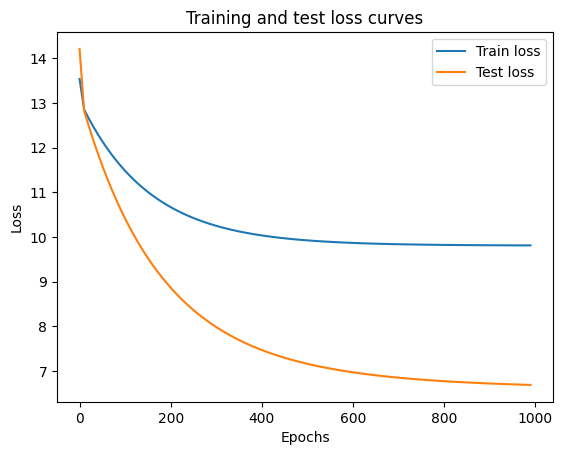

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())

The model learned the following values for weights and bias:
OrderedDict([('linear.weight', tensor([[1.1353]], device='cuda:0')), ('linear.bias', tensor([-3.4266], device='cuda:0'))])


### **Making predictions with a trained PyTorch model (inference)**

In [ ]:
X_train=torch.from_numpy(train_data).float().to(device)
y_train=torch.from_numpy(train_targets).float().to(device)
X_test=torch.from_numpy(test_data).float().to(device)
y_test=torch.from_numpy(test_targets).float().to(device)

In [ ]:
# 1. Set the model in evaluation mode
model_0.eval()
# 2. Setup the inference mode context manager
with torch.inference_mode():
  model_0.to(device)
  y_preds = model_0(X_train)

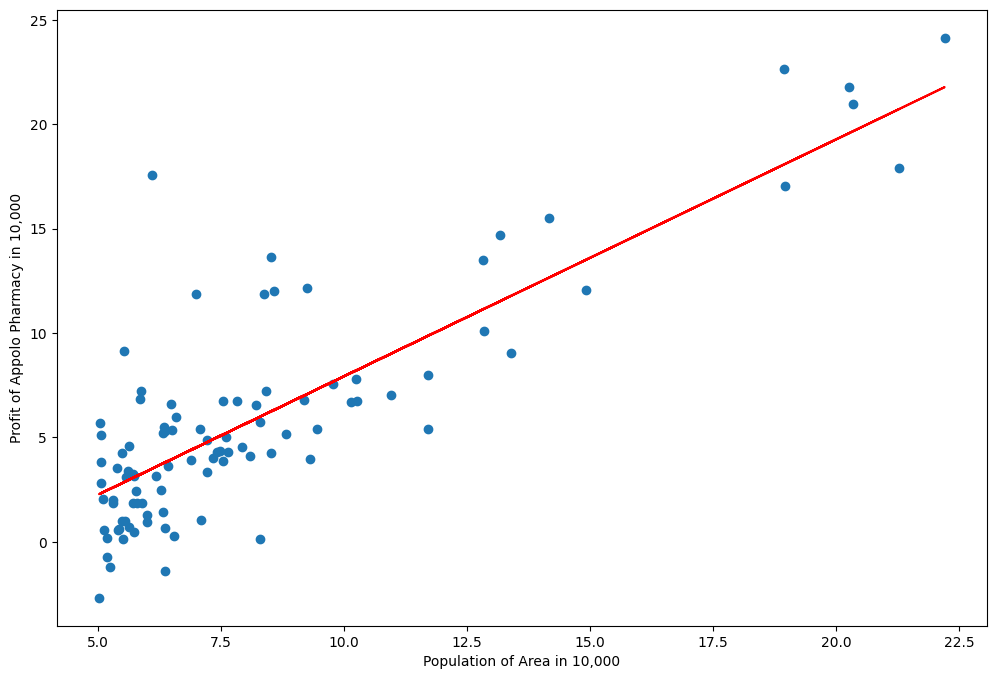

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df.Population,df.Profit)
plt.xlabel('Population of Area in 10,000')
plt.ylabel('Profit of Appolo Pharmacy in 10,000')
plt.plot(train_data,y_preds.cpu(),'r-')

## **CustomDataset class and Batch Processing**

* ### Defining Data_Class called 'CustomDataset' for building our own custom dataset compatible with dataloader.

In [ ]:
alist=[1,2,3,4,5,6,7,8,9]
print(alist)
len(alist)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


9

In [ ]:
alist[2:4] # slicing operation [ ]

[3, 4]

In [ ]:
alist[3]

4

In [ ]:
class CustomDataset:

  def __init__(self,data,targets):
    self.data=data
    self.targets=targets

  def __len__(self):
     return self.data.shape[0] #len(self.data)

  def __getitem__(self,idx):
    sliced_sample=self.data[idx,:]
    sliced_target=self.targets[idx]
    return {"sample" :torch.tensor(sliced_sample, dtype=torch.float),
            "target" : torch.tensor(sliced_target, dtype=torch.float)
            }

### Testing of Above Data Class

In [ ]:
df.Population.values[:,np.newaxis]

array([[ 6.1101],
       [ 5.5277],
       [ 8.5186],
       [ 7.0032],
       [ 5.8598],
       [ 8.3829],
       [ 7.4764],
       [ 8.5781],
       [ 6.4862],
       [ 5.0546],
       [ 5.7107],
       [14.164 ],
       [ 5.734 ],
       [ 8.4084],
       [ 5.6407],
       [ 5.3794],
       [ 6.3654],
       [ 5.1301],
       [ 6.4296],
       [ 7.0708],
       [ 6.1891],
       [20.27  ],
       [ 5.4901],
       [ 6.3261],
       [ 5.5649],
       [18.945 ],
       [12.828 ],
       [10.957 ],
       [13.176 ],
       [22.203 ],
       [ 5.2524],
       [ 6.5894],
       [ 9.2482],
       [ 5.8918],
       [ 8.2111],
       [ 7.9334],
       [ 8.0959],
       [ 5.6063],
       [12.836 ],
       [ 6.3534],
       [ 5.4069],
       [ 6.8825],
       [11.708 ],
       [ 5.7737],
       [ 7.8247],
       [ 7.0931],
       [ 5.0702],
       [ 5.8014],
       [11.7   ],
       [ 5.5416],
       [ 7.5402],
       [ 5.3077],
       [ 7.4239],
       [ 7.6031],
       [ 6.3328],
       [ 6

In [ ]:
data,targets=  df.Population.values[:,np.newaxis],df.Profit.values[:,np.newaxis]

In [ ]:
data.shape

(97, 1)

In [ ]:
data[0]

array([6.1101])

In [ ]:
targets[0]

array([17.592])

In [ ]:
custom_dataset  = CustomDataset (data=data, targets=targets)

In [ ]:
len(custom_dataset)

97

In [ ]:
custom_dataset[0]

{'sample': tensor([6.1101]), 'target': tensor([17.5920])}

In [ ]:
custom_dataset[[0,1,2]]

{'sample': tensor([[6.1101],
         [5.5277],
         [8.5186]]),
 'target': tensor([[17.5920],
         [ 9.1302],
         [13.6620]])}

In [ ]:
custom_dataset[0]['sample']

tensor([6.1101])

In [ ]:
custom_dataset[0]['target']

tensor([17.5920])

In [ ]:
for idx in range(len(custom_dataset)):
  print(custom_dataset[idx])
  if idx >5:
    break

{'sample': tensor([6.1101]), 'target': tensor([17.5920])}
{'sample': tensor([5.5277]), 'target': tensor([9.1302])}
{'sample': tensor([8.5186]), 'target': tensor([13.6620])}
{'sample': tensor([7.0032]), 'target': tensor([11.8540])}
{'sample': tensor([5.8598]), 'target': tensor([6.8233])}
{'sample': tensor([8.3829]), 'target': tensor([11.8860])}
{'sample': tensor([7.4764]), 'target': tensor([4.3483])}


### **Implementing Custom data class :**
* Train-Test Split

In [ ]:
train_data,test_data,train_targets,test_targets=train_test_split(data,targets)

In [ ]:
train_data.shape

(72, 1)

In [ ]:
test_data.shape

(25, 1)

### **Making train and test data by using CustomDataset class**

In [ ]:
train_dataset = CustomDataset(train_data,train_targets)

test_dataset = CustomDataset(test_data,test_targets)

### **Data Loader**

We will use same data class and dataset created previously .

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=12,num_workers=2)

test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=25,num_workers=2)

In [ ]:
train_loader

In [ ]:
for data in train_loader:
  print(data["sample"].shape)
  print(data["target"].shape)
  print(data)

torch.Size([12, 1])
torch.Size([12, 1])
{'sample': tensor([[ 8.8254],
        [ 8.2934],
        [ 8.2111],
        [ 5.1301],
        [ 5.1884],
        [ 8.0959],
        [11.7000],
        [ 6.3654],
        [ 7.8247],
        [ 8.5781],
        [ 5.0594],
        [ 5.5277]]), 'target': tensor([[ 5.1694],
        [ 0.1445],
        [ 6.5426],
        [ 0.5608],
        [ 0.2042],
        [ 4.1164],
        [ 8.0043],
        [ 5.3048],
        [ 6.7318],
        [12.0000],
        [ 2.8214],
        [ 9.1302]])}
torch.Size([12, 1])
torch.Size([12, 1])
{'sample': tensor([[ 5.6397],
        [ 5.7340],
        [ 9.3102],
        [ 6.5159],
        [22.2030],
        [ 6.4862],
        [ 6.8825],
        [13.1760],
        [ 7.2259],
        [ 5.0546],
        [ 6.3328],
        [ 7.0931]]), 'target': tensor([[ 4.6042],
        [ 3.1551],
        [ 3.9624],
        [ 5.3436],
        [24.1470],
        [ 6.5987],
        [ 3.9115],
        [14.6920],
        [ 3.3411],
        [ 3.8166]

### **Model**

In [ ]:
from torch import nn # nn contains all of PyTorch's building blocks for neural networks

In [ ]:
# Define the Linear Regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

Checking the contents of a PyTorch model:

Let's create a model instance with the class we've made and check its parameters using .parameters().



In [ ]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_1 = LinearRegressionModel().to(device)

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_1.parameters())

[Parameter containing:
 tensor([[0.7645]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.8300], device='cuda:0', requires_grad=True)]

We can also get the state (what the model contains) of the model using .state_dict().

In [ ]:
# List named parameters
model_1.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear.bias', tensor([0.8300], device='cuda:0'))])

Making predictions using torch.inference_mode()

To check this we can pass it the test data X_test to see how closely it predicts y_test.

When we pass data to our model, it'll go through the model's forward() method and produce a result using the computation we've defined.

Let's make some predictions.

In [ ]:
xtest=[data['sample'] for data in test_loader]

In [ ]:
xtest

[tensor([[ 5.5649],
         [ 7.6366],
         [ 5.6063],
         [ 5.3054],
         [ 6.3589],
         [ 6.3261],
         [ 9.4536],
         [18.9450],
         [ 5.6407],
         [10.2740],
         [20.2700],
         [ 5.0269],
         [ 7.3345],
         [12.8280],
         [ 7.4764],
         [ 5.7292],
         [ 6.0062],
         [ 6.4296],
         [11.7080],
         [ 9.7687],
         [ 5.2524],
         [ 5.5416],
         [20.3410],
         [14.1640],
         [ 6.1891]])]

In [ ]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_1(xtest[0].to(device))

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_1(xtest)

* **torch.inference_mode()** : Turns off gradient tracking (necessary for training but not for inference) to make forward-passes (data going through the forward() method faster.

* Note: In older PyTorch code, you may also see **torch.no_grad()** being used for inference. While torch.inference_mode() and torch.no_grad() do similar things,
torch.inference_mode() is newer, potentially faster and preferred.

In [ ]:
# Check the predictions
print(f"Number of testing samples: {len(xtest[0])}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 25
Number of predictions made: 25
Predicted values:
tensor([[ 5.0846],
        [ 6.6685],
        [ 5.1162],
        [ 4.8862],
        [ 5.6916],
        [ 5.6666],
        [ 8.0576],
        [15.3142],
        [ 5.1425],
        [ 8.6849],
        [16.3272],
        [ 4.6733],
        [ 6.4375],
        [10.6375],
        [ 6.5460],
        [ 5.2102],
        [ 5.4220],
        [ 5.7457],
        [ 9.7812],
        [ 8.2986],
        [ 4.8457],
        [ 5.0668],
        [16.3815],
        [11.6589],
        [ 5.5618]], device='cuda:0')


### **Train model**

#### Defining loss function and optimizer

In [ ]:
# Create the loss function
loss_fn = nn.MSELoss().to(device) # MSE loss
# Create the optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01) # parameters of the model to optimize,  learning rate

#### Train and Test loop

In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 300

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_1.train()

    # 1. Forward pass on train data using the forward() method inside
    for batch_idx, data in enumerate(train_loader):
      xtrain, ytrain = data["sample"].to(device), data["target"].to(device)
      y_pred = model_1(xtrain)
      # print(y_pred)
      # 2. Calculate the loss (how different are our models predictions to the ground truth)
      loss = loss_fn(y_pred, ytrain)
      loss=loss+loss.item()
      # 3. Zero grad of the optimizer
      optimizer.zero_grad()
      # 4. Loss backwards
      loss.backward()
      # 5. Progress the optimizer
      optimizer.step()

      ### Testing

      # Put the model in evaluation mode
      model_1.eval()

      with torch.inference_mode():
        # 1. Forward pass on test data
        for batch_idx, data in enumerate(test_loader):
          xtest, ytest = data["sample"].to(device), data["target"].to(device)
          test_pred = model_1(xtest)

          # 2. Caculate loss on test data
          test_loss = loss_fn(test_pred, ytest.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type
          test_loss=test_loss+test_loss.item()
        test_loss=test_loss/len(test_loader)
    loss=loss/len(train_loader)
    # Print out what's happening
    if epoch % 10 == 0:
          epoch_count.append(epoch)
          train_loss_values.append(loss.detach().cpu().numpy())
          test_loss_values.append(test_loss.detach().cpu().numpy())
          print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss} ")

Epoch: 0 | Train Loss: 7.354275703430176 | Test Loss: 33.02118682861328 
Epoch: 10 | Train Loss: 7.351718902587891 | Test Loss: 28.631608963012695 
Epoch: 20 | Train Loss: 7.3677191734313965 | Test Loss: 25.69140625 
Epoch: 30 | Train Loss: 7.392473220825195 | Test Loss: 23.73381805419922 
Epoch: 40 | Train Loss: 7.4208879470825195 | Test Loss: 22.44063949584961 
Epoch: 50 | Train Loss: 7.449864864349365 | Test Loss: 21.595073699951172 
Epoch: 60 | Train Loss: 7.477609634399414 | Test Loss: 21.04969596862793 
Epoch: 70 | Train Loss: 7.503168106079102 | Test Loss: 20.704471588134766 
Epoch: 80 | Train Loss: 7.526111602783203 | Test Loss: 20.491718292236328 
Epoch: 90 | Train Loss: 7.546338081359863 | Test Loss: 20.365795135498047 
Epoch: 100 | Train Loss: 7.563934326171875 | Test Loss: 20.296058654785156 
Epoch: 110 | Train Loss: 7.57908821105957 | Test Loss: 20.262062072753906 
Epoch: 120 | Train Loss: 7.592042446136475 | Test Loss: 20.250232696533203 
Epoch: 130 | Train Loss: 7.603047

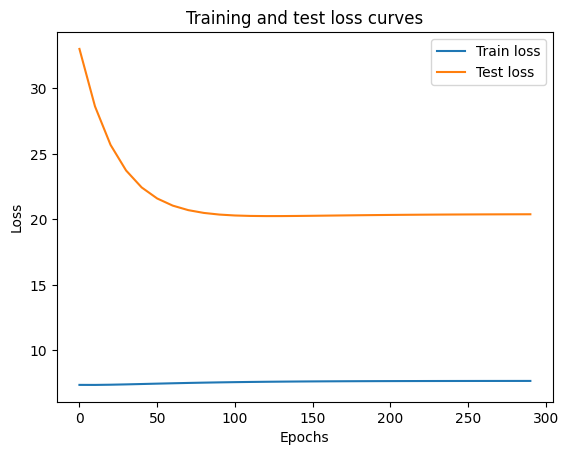

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())

The model learned the following values for weights and bias:
OrderedDict([('linear.weight', tensor([[1.1353]], device='cuda:0')), ('linear.bias', tensor([-3.4266], device='cuda:0'))])


#### **Making predictions with a trained PyTorch model (inference)**

In [ ]:
# 1. Set the model in evaluation mode
model_0.eval()
y_pred=[]
y_gt=[]

# 2. Setup the inference mode context manager
with torch.inference_mode():
  model_0.to(device)
  for data in train_loader:
    xtrain=data['sample']
    ytrain=data['target']

    y_preds = model_0(xtrain.to(device))
    y_gt.append(ytrain)
    y_pred.append(y_preds )

In [ ]:
Y_pred= torch.cat(y_pred).view(-1)
Y_label= torch.cat(y_gt).view(-1)

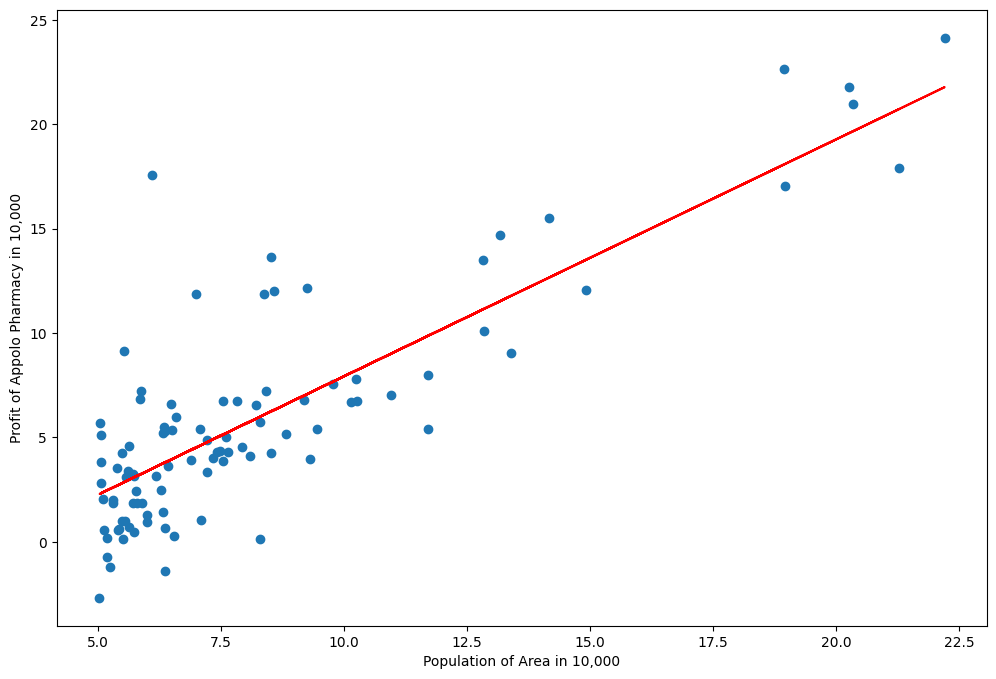

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df.Population,df.Profit)
plt.xlabel('Population of Area in 10,000')
plt.ylabel('Profit of Appolo Pharmacy in 10,000')
plt.plot(train_data,Y_pred.cpu(),'r-')